# Documentation from SEDAC CIESIN Columbia Document

## Population Count, v4.11
### Dataset Description
The population count rasters consist of estimates of human population (number of persons per pixel), consistent with national censuses and population registers, for the years 2000, 2005, 2010, 2015, and 2020. The files for this data set were produced as global rasters at 30 arc-second horizontal resolution (approximately 1 km at the equator). To enable faster global processing, and in support of research communities, the 30 arc- second data were aggregated to 2.5 arc-minute, 15 arc-minute, 30 arc-minute and 1 degree resolutions.
### Dataset Format
The files for this data set are available as global rasters in GeoTiff, ASCII (text), and netCDF format. Each downloadable is a compressed zip file containing either the global GeoTiff or ASCII for the year and resolution of the estimate, or the netCDF containing all years of the estimate at a selected resolution, the data quality layers (Table 4) and ancillary files (Table 5). A separate documentation zip file contains PDF documentation, a Microsoft Excel file (.xlsx) with country-level information and sources, and a text file (.txt) with a log of changes to the data set by version.




#### Notes
Currently, ASCII will be used to get a working model, as I have yet to figure out how to transform the data into a spherical shape

In [1]:
!pip install rasterio

In [0]:
import rasterio
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
dset_ascii = "/content/gpw_v4_population_count_rev11_2020_2pt5_min.asc"
dset_gtiff = "/content/gpw_v4_population_count_rev11_2020_2pt5_min.tif"

In [0]:
def process_ascii(file):
  data_list = file.readline().rstrip().split()
  return data_list

In [5]:
file = open(dset_ascii, 'r')
ncols = int(process_ascii(file)[1])
nrows = int(process_ascii(file)[1])
process_ascii(file)
process_ascii(file)
process_ascii(file)
nodata = process_ascii(file)[1]
ncols, nrows

(8640, 4320)

In [0]:
data_nums = []
for line in file:
  a = np.array([float(a) for a in [i if i != nodata else float('nan') for i in line.rstrip().split()]])
  data_nums.append(a)

In [0]:
n_array = np.array(data_nums)
data_nums = np.array(data_nums)
np.nansum(n_array)
palette = plt.cm.Blues
palette.set_bad('808E94',0.75)
m = np.ma.array(data_nums, mask=np.isnan(data_nums))

## ASCII Dataset Plot
This is a dataset created from the ASCII plot, not the GeoTIFF plot - to get an idea of what type of data was in the GeoTIFF dataset. Code can be easily translated to apply to the GeoTIFF file. My largest concern that made me create this before the GeoTIFF is transformation from a 2D surface to a circular one (with distorted longitudinal and latitude lines).

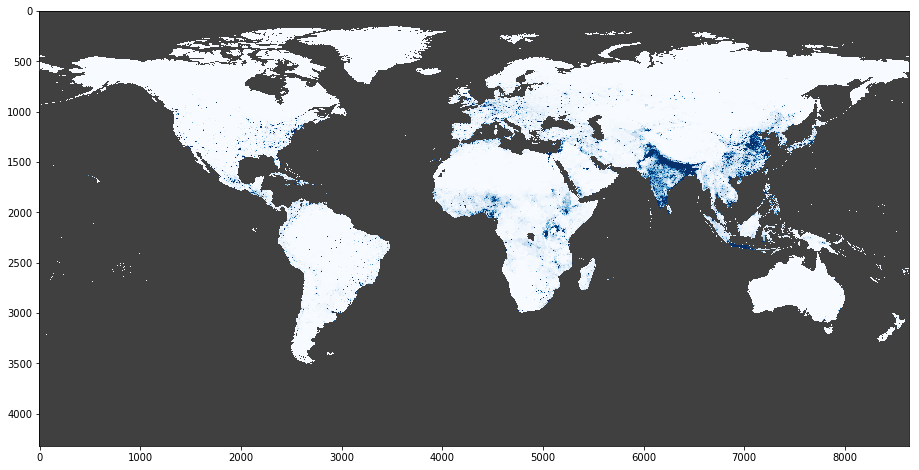

In [39]:
plt.figure(figsize = (16,8))
plt.imshow(data_nums, cmap = palette)
plt.clim(0, 10000)
plt.show()